In [41]:
from sklearn.datasets import load_iris

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
import pandas as pd

In [50]:
X, y = load_iris(return_X_y=True)

#mod = KNeighborsRegressor().fit(X, y)
#mod

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [54]:
mod = GridSearchCV(estimator=pipe,
                  param_grid={'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
                  cv=3)

mod.fit(X, y)
pred = mod.predict(X)

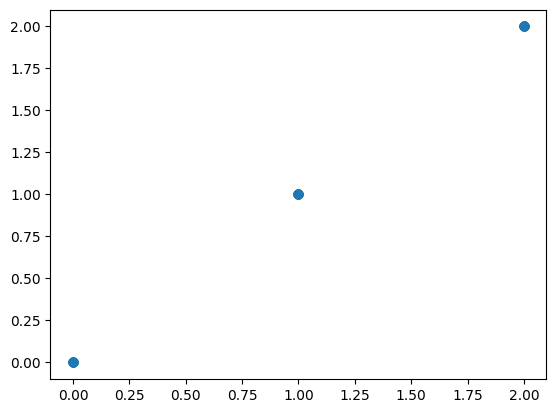

In [55]:
plt.scatter(pred, y)

In [31]:
iris_data = load_iris()
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [58]:
result = pd.DataFrame(mod.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000684,0.000484,0.000341,0.000482,1,{'model__n_neighbors': 1},0.0,0.0,0.0,0.0,0.0,1
1,0.000343,0.000485,0.000694,0.000490,2,{'model__n_neighbors': 2},0.0,0.0,0.0,0.0,0.0,1
2,0.001044,0.000011,0.001033,0.000004,3,{'model__n_neighbors': 3},0.0,0.0,0.0,0.0,0.0,1
3,0.000353,0.000499,0.001052,0.000007,4,{'model__n_neighbors': 4},0.0,0.0,0.0,0.0,0.0,1
4,0.000687,0.000486,0.000376,0.000503,5,{'model__n_neighbors': 5},0.0,0.0,0.0,0.0,0.0,1
5,0.000699,0.000495,0.000690,0.000489,6,{'model__n_neighbors': 6},0.0,0.0,0.0,0.0,0.0,1
6,0.000000,0.000000,0.001340,0.001895,7,{'model__n_neighbors': 7},0.0,0.0,0.0,0.0,0.0,1
7,0.001318,0.001864,0.000000,0.000000,8,{'model__n_neighbors': 8},0.0,0.0,0.0,0.0,0.0,1
8,0.001331,0.001882,0.000000,0.000000,9,{'model__n_neighbors': 9},0.0,0.0,0.0,0.0,0.0,1
9,0.001333,0.001885,0.001334,0.001886,10,{'model__n_neighbors': 10},0.0,0.0,0.0,0.0,0.0,1


In [61]:
result[result["mean_test_score"] == result["mean_test_score"].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000684,0.000484,0.000341,0.000482,1,{'model__n_neighbors': 1},0.0,0.0,0.0,0.0,0.0,1
1,0.000343,0.000485,0.000694,0.000490,2,{'model__n_neighbors': 2},0.0,0.0,0.0,0.0,0.0,1
2,0.001044,0.000011,0.001033,0.000004,3,{'model__n_neighbors': 3},0.0,0.0,0.0,0.0,0.0,1
3,0.000353,0.000499,0.001052,0.000007,4,{'model__n_neighbors': 4},0.0,0.0,0.0,0.0,0.0,1
4,0.000687,0.000486,0.000376,0.000503,5,{'model__n_neighbors': 5},0.0,0.0,0.0,0.0,0.0,1
5,0.000699,0.000495,0.000690,0.000489,6,{'model__n_neighbors': 6},0.0,0.0,0.0,0.0,0.0,1
6,0.000000,0.000000,0.001340,0.001895,7,{'model__n_neighbors': 7},0.0,0.0,0.0,0.0,0.0,1
7,0.001318,0.001864,0.000000,0.000000,8,{'model__n_neighbors': 8},0.0,0.0,0.0,0.0,0.0,1
8,0.001331,0.001882,0.000000,0.000000,9,{'model__n_neighbors': 9},0.0,0.0,0.0,0.0,0.0,1
9,0.001333,0.001885,0.001334,0.001886,10,{'model__n_neighbors': 10},0.0,0.0,0.0,0.0,0.0,1
